## IMPORT MODUL

In [1]:
import pandas as pd
import re
from datetime import datetime
import dateparser
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
import numpy
import sqlite3
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import unicodedata
from collections import Counter, OrderedDict

## LOAD DATA

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

alay_dict = pd.read_csv('new_kamusalay.csv', encoding = "ISO-8859-1", header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})

id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

abusive_dict = pd.read_csv('abusive.csv')['ABUSIVE'].tolist()

In [3]:
print("Shape :", df.shape)
df.head(15)

Shape : (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Shape: ", alay_dict.shape)
alay_dict

Shape:  (15173, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15168,yg,yang
15169,utk,untuk
15170,trs,terus
15171,gue,aku


In [5]:
abusive_dict

['alay',
 'ampas',
 'buta',
 'keparat',
 'anjing',
 'anjir',
 'babi',
 'bacot',
 'bajingan',
 'banci',
 'bandot',
 'buaya',
 'bangkai',
 'bangsat',
 'bego',
 'bejat',
 'bencong',
 'berak',
 'bisu',
 'celeng',
 'jancuk',
 'bodoh',
 'berengsek',
 'budek',
 'burik',
 'jamban',
 'cocot',
 'congor',
 'culun',
 'cupu',
 'dongok',
 'dungu',
 'edan',
 'tai',
 'ngewe',
 'geblek',
 'gembel',
 'gila',
 'goblok',
 'iblis',
 'idiot',
 'jablay',
 'jembud',
 'jembut',
 'jijik',
 'kacrut',
 'kafir',
 'modar',
 'kampang',
 'kampret',
 'kampungan',
 'kimak',
 'kontol',
 'kunti',
 'tuyul',
 'kunyuk',
 'mampus',
 'memek',
 'monyet',
 'najis',
 'nete',
 'ngentot',
 'noob',
 'pecun',
 'perek',
 'sampah',
 'sarap',
 'setan',
 'silit',
 'bokong',
 'sinting',
 'sompret',
 'sontoloyo',
 'terkutuk',
 'titit',
 'pantat',
 'tolol',
 'udik',
 'antek',
 'asing',
 'ateis',
 'sitip',
 'autis',
 'picek',
 'ayam kampus',
 'bani kotak',
 'bispak',
 'bisyar',
 'bokep',
 'bong',
 'cacat',
 'cct',
 'cebong',
 'taplak',
 'cu

In [6]:
print("Shape: ", id_stopword_dict.shape)
id_stopword_dict.head()

Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


## PANDAS

In [7]:
df.HS.value_counts()

HS
0    7608
1    5561
Name: count, dtype: int64

In [8]:
df.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

In [9]:
print("Toxic shape: ", df[(df['HS'] == 1) | (df['Abusive'] == 1)].shape)
print("Non-toxic shape: ", df[(df['HS'] == 0) & (df['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [10]:
print("Jumlah data null :")
print(df.isnull().sum())

Jumlah data null :
Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64


In [11]:
print("Jumlah data duplikat :",df.duplicated().sum())

Jumlah data duplikat : 125


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print("Jumlah data duplikat :",df.duplicated().sum())

Jumlah data duplikat : 0


## PREPROCESS DATA

In [14]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text)  # Remove every '\n'
    text = re.sub('rt', ' ', text)  # Remove every retweet symbol
    text = re.sub('user', ' ', text)  # Remove every username
    text = re.sub(r'(www\.[^\s]+|https?://[^\s]+|http?://[^\s]+)', ' ', text)  # Remove every URL
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

def remove_unicode(text):
    text = re.sub(r'\bx[a-fA-F0-9]{2}\b', '', text)
    text = re.sub(r'\bx([a-fA-F0-9]{2})', '', text)
    return text

def remove_nonaplhanumeric(text):
    text = re.sub(r'[^0-9a-zA-Z]+', ' ', text)
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [15]:
def preprocess(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    text = normalize_alay(text)
    text = stemming(text)
    text = remove_stopword(text)
    text = remove_unicode(text)
    text = remove_extra_spaces(text)
    return text

In [16]:
df['Tweet'] = df['Tweet'].apply(preprocess)

In [17]:
print("Shape: ", df.shape)
df.head(15)

Shape:  (13044, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati lantas remeh perhati...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gaul cigax jifla cal licew,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak kawan kawan,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0
7,selesai re watch aldnoah zero kampret 2 karakt...,0,1,0,0,0,0,0,0,0,0,0,0
8,admin belanja po nak makan ais kepal milo ais ...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

### Most common words

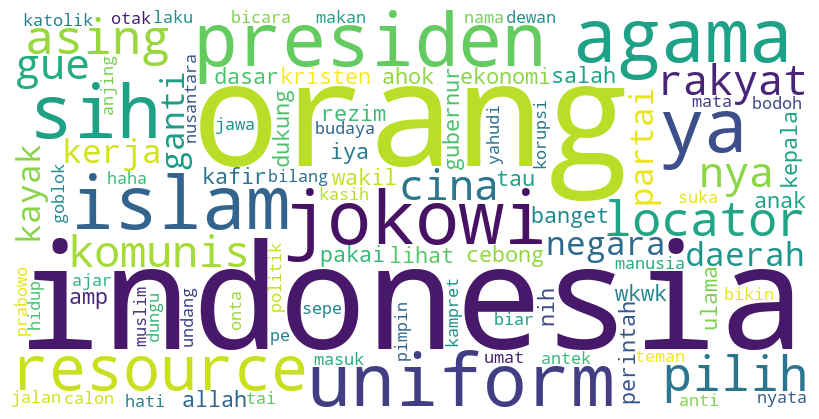

In [18]:
words = []
for text in df['Tweet']:
    words.extend(text.split())

word_count = Counter(words)

top_words = word_count.most_common(100)

text = ' '.join([word for word, count in top_words])

wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


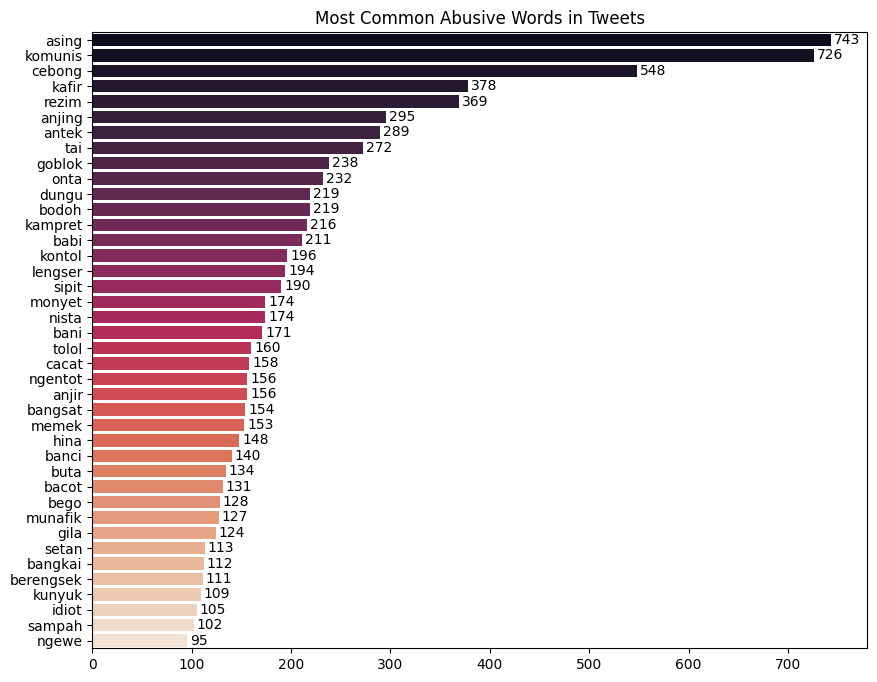

In [19]:
abusive_words = []
for tweet in df['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_dict:
            abusive_words.append(word)

top_abusive_words = dict(Counter(abusive_words).most_common(40))

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=list(top_abusive_words.values()),
    y=list(top_abusive_words.keys()),
    hue=list(top_abusive_words.keys()),
    dodge=False,
    legend=False,  # Set legend to False
    palette='rocket'
)
for i, v in enumerate(top_abusive_words.values()):
    ax.text(v + 3, i, str(v), color='black', va='center')
plt.title('Most Common Abusive Words in Tweets')
plt.show()

### Visualisasi Label Distribution

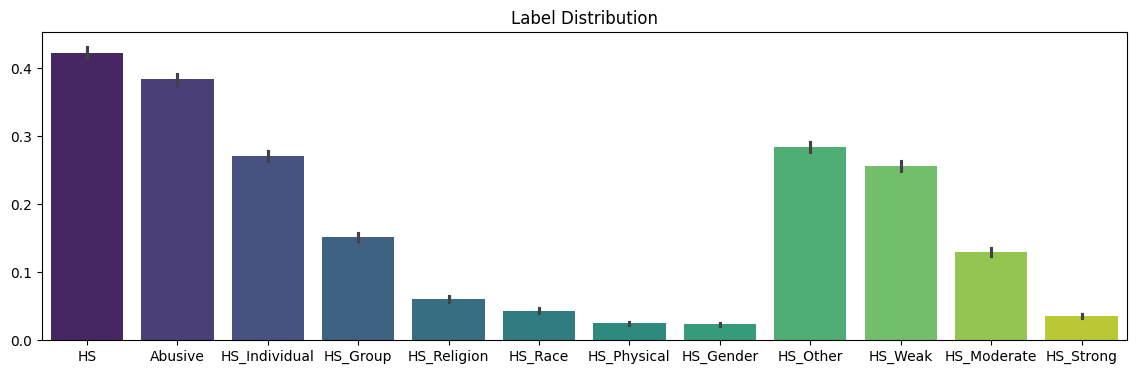

In [20]:
plt.figure(figsize=(14, 4))
sns.barplot(data=df, palette='viridis') 
plt.title('Label Distribution')
plt.show()

### Visualisasi Korelasi antara 'Abusive' dengan Label Distribution

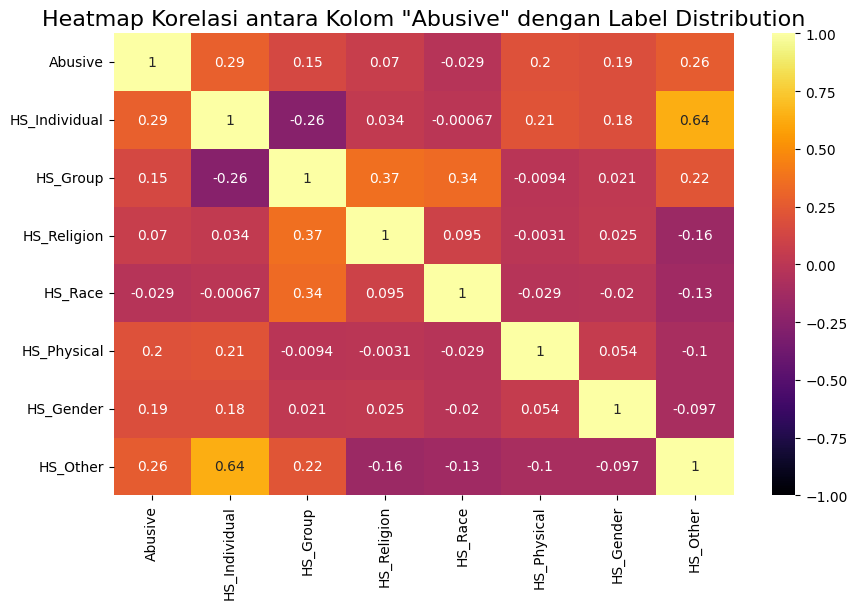

In [21]:
correlation = df[['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other']].corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap="inferno", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara Kolom "Abusive" dengan Label Distribution', fontsize=16)
plt.show()

### Visualisasi Kata yang sering muncul pada kolom HS_Individual

In [22]:
words_hs_individual = []
for tweet in df[df['HS_Individual'] == 1]['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0:
            words_hs_individual.append(word)

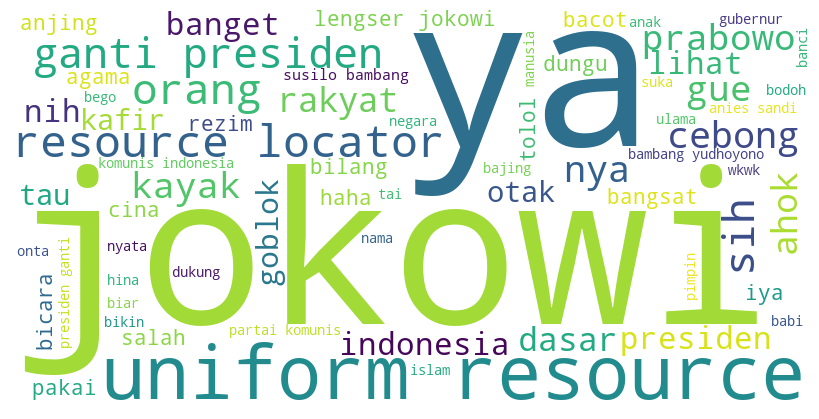

In [23]:
text = ' '.join(words_hs_individual)

wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### Visualisasi Kata yang sering muncul pada kolom HS_Group

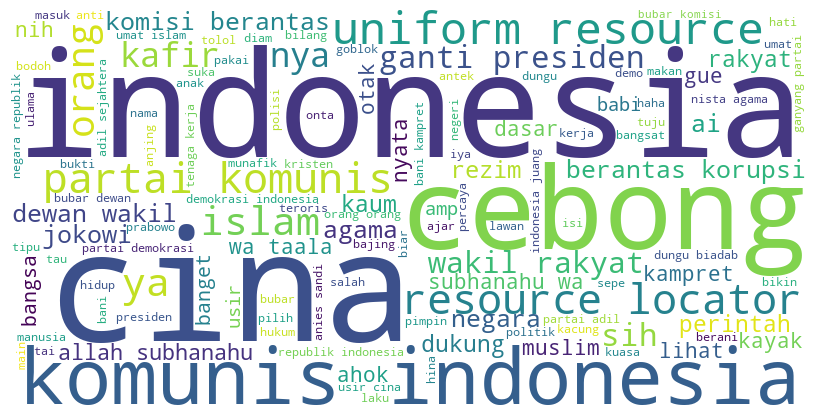

In [24]:
words_hs_group = []
for tweet in df[df['HS_Group'] == 1]['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0:
            words_hs_group.append(word)

text = ' '.join(words_hs_group)

wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### Visualisasi Kata yang sering muncul pada kolom HS_Religion

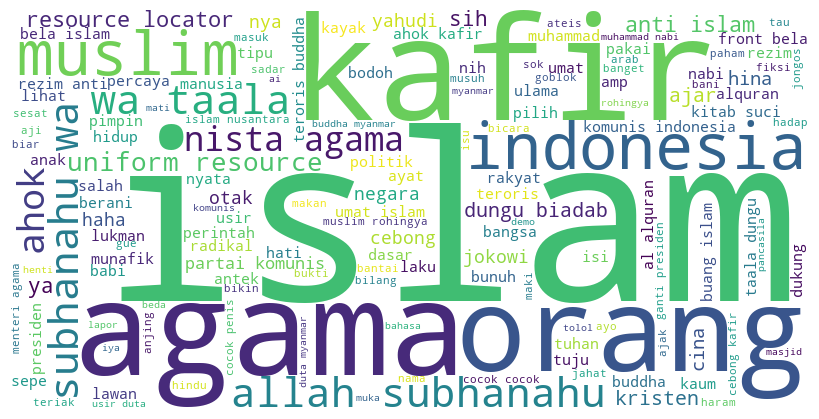

In [25]:
words_hs_religion = []
for tweet in df[df['HS_Religion'] == 1]['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0:
            words_hs_religion.append(word)

text = ' '.join(words_hs_religion)

wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### Visualisasi Korelasi antara Tweet (HS) dengan HS_Strong, HS_Moderate, HS_Weak'

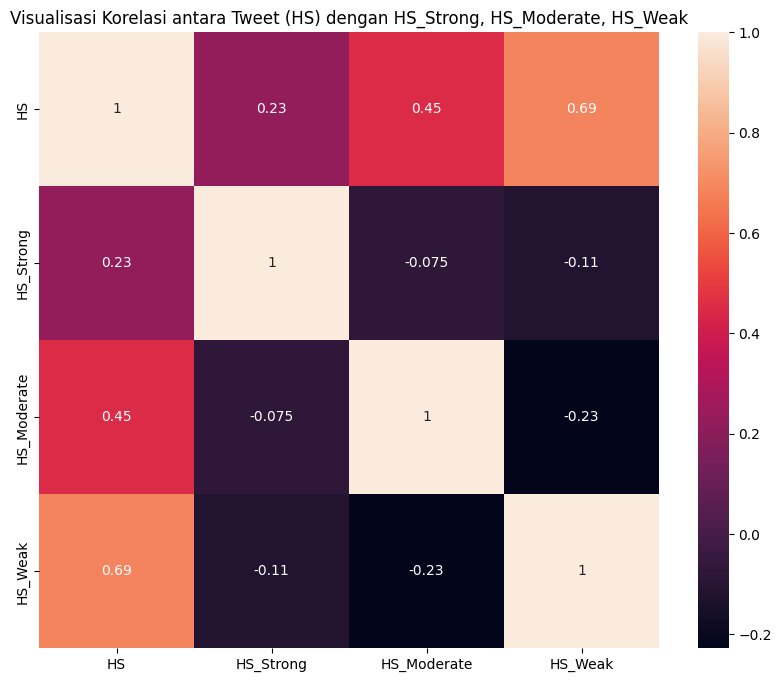

In [26]:
corr = df[['HS', 'HS_Strong', 'HS_Moderate', 'HS_Weak']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Visualisasi Korelasi antara Tweet (HS) dengan HS_Strong, HS_Moderate, HS_Weak')
plt.show()

### Visualisasi Jumlah Kata Abusive dalam Kolom HS_Strong, HS_Moderate, dan HS_Weak

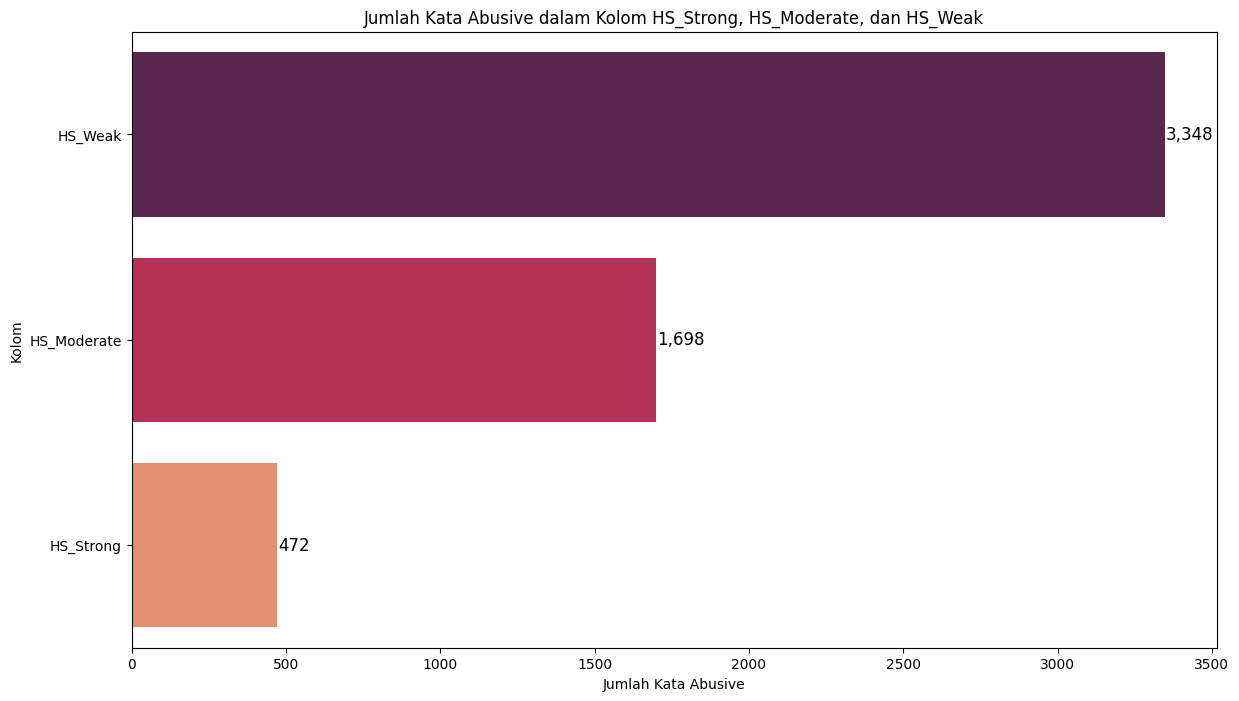

In [27]:
abusive_count = pd.Series()
for col in ['HS_Weak', 'HS_Moderate', 'HS_Strong']:
    abusive_count[col] = df[col].value_counts().get(1, 0)  # Gunakan get untuk menangani nilai yang tidak ada

plt.figure(figsize=(14, 8))
sns.barplot(
    x=abusive_count.values,
    y=abusive_count.index,
    hue=abusive_count.index,
    palette='rocket',
    orient='h',
    legend=False
)
for i, v in enumerate(abusive_count.values):
    plt.text(v + 3, i, f"{v:,}", va='center', color='black', fontsize=12)  # Format angka dengan pemisah ribuan
plt.xlabel('Jumlah Kata Abusive')
plt.ylabel('Kolom')
plt.title('Jumlah Kata Abusive dalam Kolom HS_Strong, HS_Moderate, dan HS_Weak')
plt.show()

### Visualisasi untuk Tweet dalam setiap kategori HS

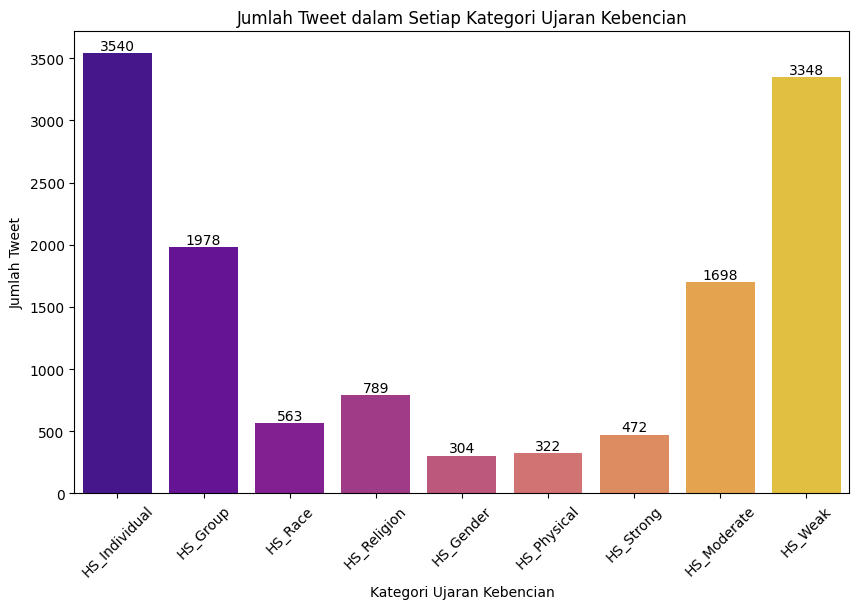

In [28]:
num_HS_Individual = len(df[df['HS_Individual'] == 1])
num_HS_Group = len(df[df['HS_Group'] == 1])
num_HS_Race = len(df[df['HS_Race'] == 1])
num_HS_Religion = len(df[df['HS_Religion'] == 1])
num_HS_Gender = len(df[df['HS_Gender'] == 1])
num_HS_Physical = len(df[df['HS_Physical'] == 1])
num_HS_Strong = len(df[df['HS_Strong'] == 1])
num_HS_Moderate = len(df[df['HS_Moderate'] == 1])
num_HS_Weak = len(df[df['HS_Weak'] == 1])

kolom = ['HS_Individual', 'HS_Group', 'HS_Race', 'HS_Religion', 'HS_Gender', 'HS_Physical', 'HS_Strong', 'HS_Moderate', 'HS_Weak']

jumlah_tweet = [num_HS_Individual, num_HS_Group, num_HS_Race, num_HS_Religion, num_HS_Gender, num_HS_Physical, num_HS_Strong, num_HS_Moderate, num_HS_Weak]

plt.figure(figsize=(10, 6))
plot = sns.barplot(x=kolom, y=jumlah_tweet, hue=kolom, palette='plasma', legend=False)  # Assign x to hue and set legend=False

for bar, count in zip(plot.patches, jumlah_tweet):
    plot.text(bar.get_x() + bar.get_width() / 2, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Tweet dalam Setiap Kategori Ujaran Kebencian')
plt.xlabel('Kategori Ujaran Kebencian')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
plt.show()


### Sensor kata kata abusive yang terdapat pada Tweet

In [29]:
with open('abusive.csv', 'r') as f:
    abusive_words = f.read().splitlines()

for word in abusive_words:
    df['Tweet'] = df['Tweet'].str.replace(word, '[SENSORED]', case=False)

df.to_csv('abusive_sensored.csv', index=False, encoding='utf-8')

In [30]:
df_abusive = pd.read_csv('abusive_sensored.csv', encoding = "utf-8")
df_abusive

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati lantas remeh perhati...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau [SENSORED] [SENSORED] gaul cigax jif...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata [SENSORED] lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum ce[SENSORED] [SENSORED] lihat [SENSORED] ...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,bicara ndasmu [SENSORED] sekata [SENSORED],1,1,1,0,0,0,1,0,0,1,0,0
13040,kasur enak [SENSORED],0,1,0,0,0,0,0,0,0,0,0,0
13041,hati hati [SENSORED] bosan duh,0,0,0,0,0,0,0,0,0,0,0,0
13042,bom real mudah deteksi bom kubur dahsyat ledak...,0,0,0,0,0,0,0,0,0,0,0,0
